In [124]:
#We have stored our model from MNIST_CNN
#Now we have 2 files: modelM.json and modelM.h5, which we can send any one to use them with following code
#This model predicts 0-9 class of MNIST dataset

from keras.models import model_from_json

json_file = open('modelM.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('modelM.h5')

model = loaded_model

In [125]:
# from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
# #test9 is already in 28*28 size, but we get problem with test3 and test4 because our model is unable to convert them to 28x28
# #So what to do for those tests?
# #We use function of OpenCv: This is used in cell below
# im = Image.open("test9.png")
# img = im.convert('L')
# print(img.size)
# npImg = np.array(img)
# print(npImg.size)

# temp = npImg.reshape(1,28,28,1)

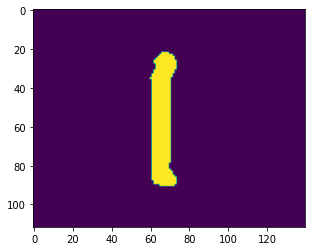

In [127]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9']

#enter input image here
image = cv2.imread('test1.png')
height, width, depth = image.shape

#Perform preprocessing on the image
#resizing the image to cnicfind spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#binary
ret,thresh = cv2.threshold(gray,40,255,cv2.THRESH_BINARY_INV)

plt.imshow(thresh)

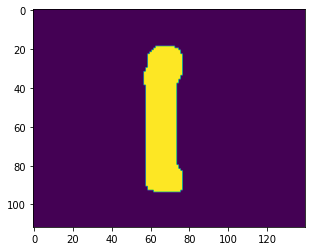

In [128]:
#dilation
kernel = np.ones((7,7), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

plt.imshow(img_dilation)

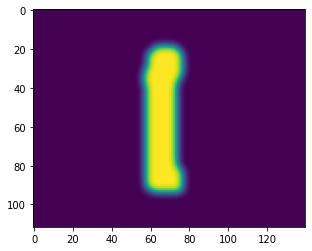

In [129]:
#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(11,11),0)
    
plt.imshow(gsblur)

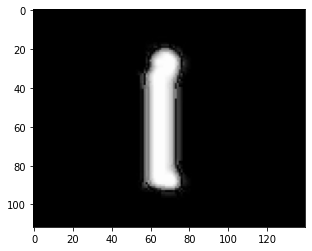

In [130]:
#Notice now the body of the written text is pure black, this is done to avoid any small discontinuties
imagen = cv2.bitwise_not(image)
gsblur2 = cv2.cvtColor(gsblur,cv2.COLOR_GRAY2BGR)
out = cv2.bitwise_and(gsblur2,imagen)
plt.imshow(out)

In [131]:
roi = cv2.resize(out, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

roi = np.array(roi)
t = np.copy(roi)
#t = np.invert(t)       #We don't need to invert the image now again: We have done with opencv
t = t.reshape(1,28,28,1)
t = t.astype('float32')    
t = t / 255.01
   
pred = model.predict(t)
#print(pred)
print('Predicted:'+characters[np.argmax(pred)])

Predicted:1
